In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\ Drive/Data/train.zip > /dev/null

In [4]:
import os
path = "/content/train/"
files = os.listdir(path)
files = [f for f in os.listdir(path) if not f.startswith('.')]
print(files)

classes = {files[i]: int(files[i]) for i in range(0, 10)}

print(classes)

['0', '1', '6', '7', '8', '5', '3', '9', '4', '2']
{'0': 0, '1': 1, '6': 6, '7': 7, '8': 8, '5': 5, '3': 3, '9': 9, '4': 4, '2': 2}


In [5]:
import cv2

In [6]:
X = []
Y = []

for cl in classes:
    pth=path+cl
#    print(pth)
    for img_name in os.listdir(pth):
#        print(img_name)
        img = cv2.imread(pth+"/"+img_name,0)
#        print(img)
        X.append(img)
        Y.append(cl)
print('dataset created')

dataset created


In [7]:
pd.Series(Y).value_counts()

0    100
1    100
6    100
7    100
8    100
5    100
3    100
9    100
4    100
2    100
dtype: int64

In [8]:
print(type(X))
X = np.array(X)
Y = np.array(Y)
print(type(X))
X.shape

<class 'list'>
<class 'numpy.ndarray'>


(1000, 32, 32)

actual number 9


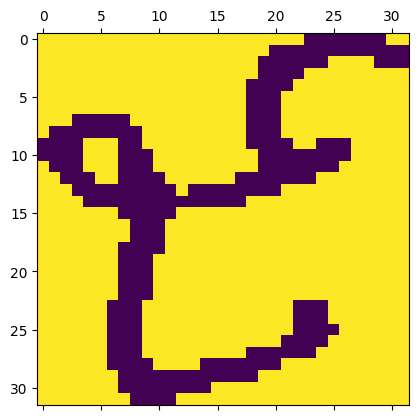

In [9]:
plt.matshow(X[700])
print('actual number',Y[700])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
len(X_test)

200

In [12]:
len(X_train)

800

In [13]:
X_train[0].shape

(32, 32)

In [14]:
X_train[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

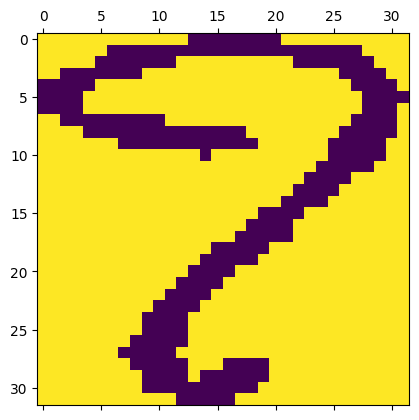

In [15]:
plt.matshow(X_train[6])

In [16]:
y_train[:7]

array(['0', '5', '3', '5', '4', '5', '1'], dtype='<U1')

# Scaling is done below but without scaling also it is running well.

In [17]:
X_train=X_train/255
X_test=X_test/255

In [18]:
X_train[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [19]:
X_train_flattened=X_train.reshape(len(X_train),32*32)
X_test_flattened=X_test.reshape(len(X_test),32*32)
X_test_flattened.shape

(200, 1024)

In [20]:
X_train_flattened.shape

(800, 1024)

In [21]:
y_train = np.array(y_train)

y_train = y_train.astype(int)
y_train

array([0, 5, 3, 5, 4, 5, 1, 2, 8, 4, 0, 1, 2, 4, 3, 7, 3, 6, 2, 9, 7, 9,
       2, 0, 4, 0, 5, 7, 2, 5, 7, 2, 8, 5, 0, 0, 6, 2, 1, 7, 0, 6, 5, 9,
       7, 1, 8, 0, 0, 6, 0, 2, 9, 4, 7, 7, 5, 2, 2, 0, 9, 8, 0, 6, 7, 4,
       9, 7, 3, 7, 8, 1, 2, 6, 5, 0, 1, 3, 0, 9, 5, 9, 6, 6, 6, 9, 7, 8,
       6, 2, 2, 9, 5, 8, 7, 8, 2, 8, 0, 1, 5, 8, 8, 8, 9, 2, 7, 5, 2, 5,
       5, 5, 5, 9, 8, 8, 6, 7, 9, 6, 0, 1, 7, 3, 9, 5, 7, 8, 9, 1, 9, 7,
       9, 3, 0, 7, 9, 5, 4, 5, 8, 8, 1, 1, 7, 8, 5, 2, 0, 2, 1, 6, 4, 0,
       6, 1, 7, 8, 7, 1, 8, 5, 1, 8, 1, 0, 9, 1, 7, 4, 1, 9, 1, 1, 0, 9,
       8, 0, 2, 4, 6, 1, 9, 6, 6, 2, 5, 1, 2, 9, 1, 0, 3, 1, 5, 0, 8, 8,
       9, 2, 0, 8, 5, 5, 3, 3, 2, 7, 0, 5, 5, 2, 9, 6, 4, 9, 3, 4, 5, 8,
       0, 9, 8, 5, 8, 7, 0, 0, 3, 6, 6, 7, 7, 8, 6, 0, 1, 7, 4, 3, 6, 5,
       2, 3, 5, 5, 3, 1, 3, 3, 5, 4, 7, 1, 6, 3, 4, 3, 7, 8, 0, 1, 5, 2,
       7, 1, 1, 8, 5, 8, 8, 0, 2, 0, 7, 2, 2, 2, 3, 5, 3, 0, 0, 7, 5, 0,
       0, 7, 1, 8, 4, 5, 9, 1, 8, 1, 8, 8, 4, 4, 3,

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 1.2742 - accuracy: 0.6500
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3692 - accuracy: 0.9175
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2104 - accuracy: 0.9388
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1579 - accuracy: 0.9650
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1203 - accuracy: 0.9700
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0812 - accuracy: 0.9875
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0600 - accuracy: 0.9975
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9975
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0383 - accuracy: 0.9987
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0368 - accuracy: 0.9987
Epoch 11/20
25/25 [

In [23]:
y_test = np.array(y_test)

y_test = y_test.astype(int)
y_test

array([5, 9, 9, 3, 8, 3, 3, 5, 4, 1, 4, 0, 3, 2, 2, 4, 6, 4, 9, 7, 5, 1,
       7, 5, 6, 6, 1, 2, 2, 2, 7, 1, 3, 8, 7, 1, 3, 5, 2, 0, 7, 0, 7, 2,
       6, 6, 2, 3, 8, 4, 5, 4, 6, 5, 0, 0, 3, 0, 6, 4, 6, 0, 5, 6, 3, 3,
       3, 4, 0, 5, 1, 8, 5, 9, 6, 6, 3, 0, 5, 7, 3, 0, 6, 0, 7, 5, 2, 9,
       9, 7, 7, 8, 5, 6, 9, 8, 9, 0, 0, 4, 9, 7, 2, 6, 3, 3, 5, 2, 1, 2,
       5, 4, 2, 4, 0, 8, 1, 2, 5, 6, 4, 8, 9, 6, 6, 5, 5, 8, 4, 4, 5, 4,
       6, 2, 5, 0, 1, 6, 0, 0, 0, 6, 9, 6, 4, 2, 4, 6, 4, 7, 3, 1, 2, 8,
       2, 8, 7, 3, 0, 4, 5, 9, 3, 3, 4, 3, 6, 3, 7, 7, 7, 8, 1, 2, 8, 7,
       6, 6, 4, 3, 8, 3, 7, 5, 4, 1, 7, 7, 2, 9, 2, 4, 3, 1, 6, 8, 7, 6,
       3, 0])

In [24]:
model.evaluate(X_test_flattened,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9850


[0.07188303768634796, 0.9850000143051147]

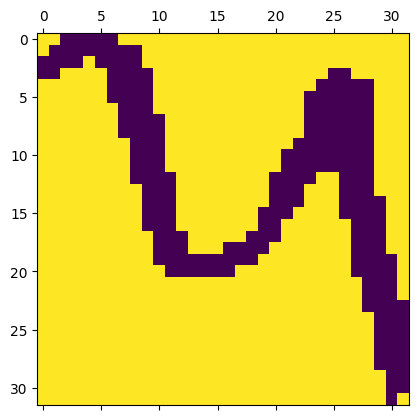

In [25]:
plt.matshow(X_test[7])

In [26]:
model.predict(X_test_flattened)

7/7 [==============================] - 0s 3ms/step


array([[0.00180116, 0.00196598, 0.6668531 , ..., 0.9195722 , 0.7423619 ,
        0.00471782],
       [0.41025114, 0.63400793, 0.02499477, ..., 0.02585363, 0.850018  ,
        0.9999243 ],
       [0.3428556 , 0.34261143, 0.05968051, ..., 0.0527967 , 0.95472133,
        0.99843067],
       ...,
       [0.17662409, 0.10884117, 0.10045867, ..., 0.03923067, 0.34193674,
        0.7153324 ],
       [0.03161445, 0.16836719, 0.9741636 , ..., 0.95156056, 0.00118934,
        0.08050323],
       [0.99997723, 0.8832054 , 0.76250696, ..., 0.8970225 , 0.9660715 ,
        0.21208261]], dtype=float32)

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

7/7 [==============================] - 0s 2ms/step


array([0.00180116, 0.00196598, 0.6668531 , 0.44507232, 0.9375327 ,
       0.9999727 , 0.00172091, 0.9195722 , 0.7423619 , 0.00471782],
      dtype=float32)

In [28]:
np.argmax(y_predicted[0])

5

In [29]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[0]

5

In [30]:
y_test

array([5, 9, 9, 3, 8, 3, 3, 5, 4, 1, 4, 0, 3, 2, 2, 4, 6, 4, 9, 7, 5, 1,
       7, 5, 6, 6, 1, 2, 2, 2, 7, 1, 3, 8, 7, 1, 3, 5, 2, 0, 7, 0, 7, 2,
       6, 6, 2, 3, 8, 4, 5, 4, 6, 5, 0, 0, 3, 0, 6, 4, 6, 0, 5, 6, 3, 3,
       3, 4, 0, 5, 1, 8, 5, 9, 6, 6, 3, 0, 5, 7, 3, 0, 6, 0, 7, 5, 2, 9,
       9, 7, 7, 8, 5, 6, 9, 8, 9, 0, 0, 4, 9, 7, 2, 6, 3, 3, 5, 2, 1, 2,
       5, 4, 2, 4, 0, 8, 1, 2, 5, 6, 4, 8, 9, 6, 6, 5, 5, 8, 4, 4, 5, 4,
       6, 2, 5, 0, 1, 6, 0, 0, 0, 6, 9, 6, 4, 2, 4, 6, 4, 7, 3, 1, 2, 8,
       2, 8, 7, 3, 0, 4, 5, 9, 3, 3, 4, 3, 6, 3, 7, 7, 7, 8, 1, 2, 8, 7,
       6, 6, 4, 3, 8, 3, 7, 5, 4, 1, 7, 7, 2, 9, 2, 4, 3, 1, 6, 8, 7, 6,
       3, 0])

In [31]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 23,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 26,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 21,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 12]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

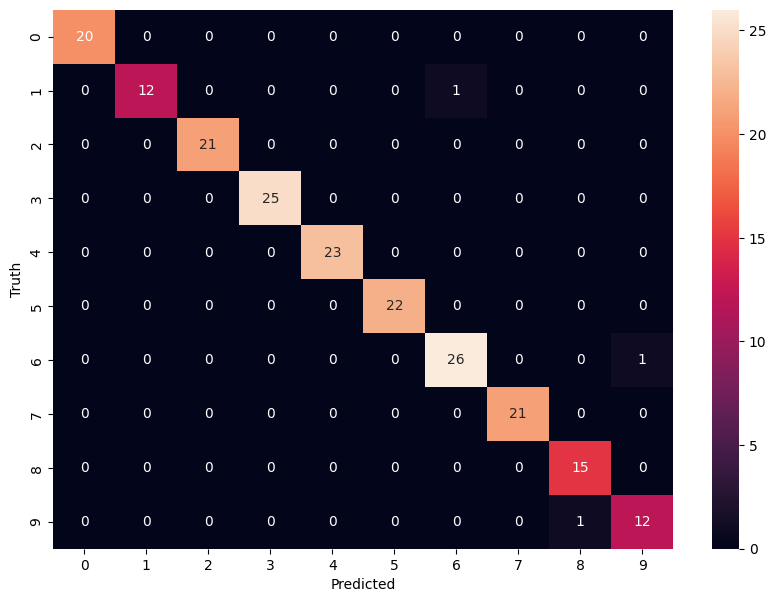

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')